# UNSUPERVISED LEARNING AND PCA

In [1]:
#import various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data 
data=pd.read_csv(r'C:\Users\user\Downloads\NCI60_X.csv')

In [3]:
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
60,V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
61,V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
62,V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [4]:
data.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [5]:
#shape of data
data.shape

(64, 6831)

In [6]:
#statistical description of data
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,-0.079551,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,0.890365,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-1.850020,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.660019,-0.177500,-0.327500,-0.328750,-0.232519,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.304980,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,2.929980,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000


In [7]:
#information regarding data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6831 entries, Unnamed: 0 to 6830
dtypes: float64(6830), object(1)
memory usage: 3.3+ MB


In [8]:
#checking null values
data.isna().sum()

Unnamed: 0    0
1             0
2             0
3             0
4             0
             ..
6826          0
6827          0
6828          0
6829          0
6830          0
Length: 6831, dtype: int64

In [9]:
#label encoding
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data['Unnamed: 0']=lab_enc.fit_transform(data['Unnamed: 0'])

In [10]:
data.head(5)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,11,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,22,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,33,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,44,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [11]:
x = data

# KMEANS

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmean_inst = KMeans(n_clusters=5)

In [14]:
kmean_inst.fit(x)

KMeans(n_clusters=5)

In [15]:
kmean_inst.inertia_

204050.07120487466

In [16]:
kmean_inst.cluster_centers_

array([[ 5.55555556e+01, -1.00021700e-02, -9.00021667e-02, ...,
        -5.56668833e-01,  8.44422778e-02,  3.76664444e-01],
       [ 3.40000000e+01, -7.05562767e-02,  1.03148149e-01, ...,
         2.19628907e-01,  3.83332594e-01,  7.87036333e-01],
       [ 9.00000000e+00,  4.38867222e-02, -4.83355000e-02, ...,
        -3.12779944e-01, -1.85557722e-01, -6.85002167e-01],
       [ 5.30000000e+01,  8.58333333e-02, -2.79166667e-01, ...,
         3.52500000e-01,  1.34166667e-01, -3.99166667e-01],
       [ 2.95000000e+01, -1.32495125e-01, -3.02495000e-01, ...,
        -1.37999512e+00, -6.49951250e-02, -1.82500000e-01]])

In [17]:
kmean_inst.labels_

array([2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

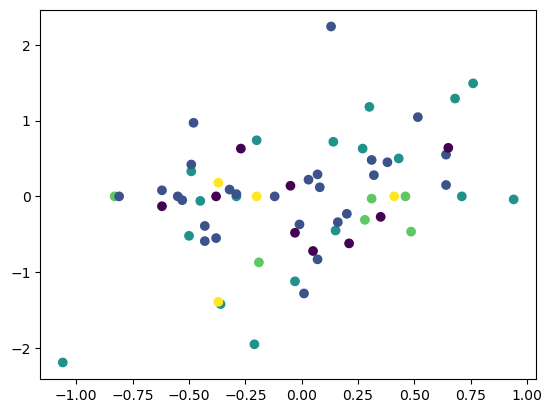

In [18]:
plt.scatter(data['1'], data['2'], c = kmean_inst.labels_)
plt.show()

In [19]:
#sns.pairplot(data)

In [20]:
km_labels = kmean_inst.labels_

In [21]:
#data['km_clus_label'] = km_labels

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

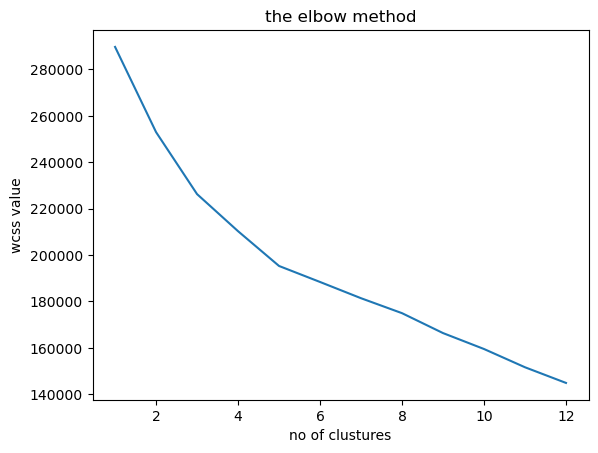

In [22]:
#elbow method
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)    
plt.title('the elbow method') 
plt.xlabel('no of clustures')
plt.ylabel('wcss value')
plt.show

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
sil_avg=silhouette_score(x,km_labels)

In [25]:
sil_avg

0.11801398828654316

In [26]:
from sklearn.preprocessing import StandardScaler

# Agglomerative clustering models

In [27]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


In [28]:
mergings = linkage(x , method = "average")

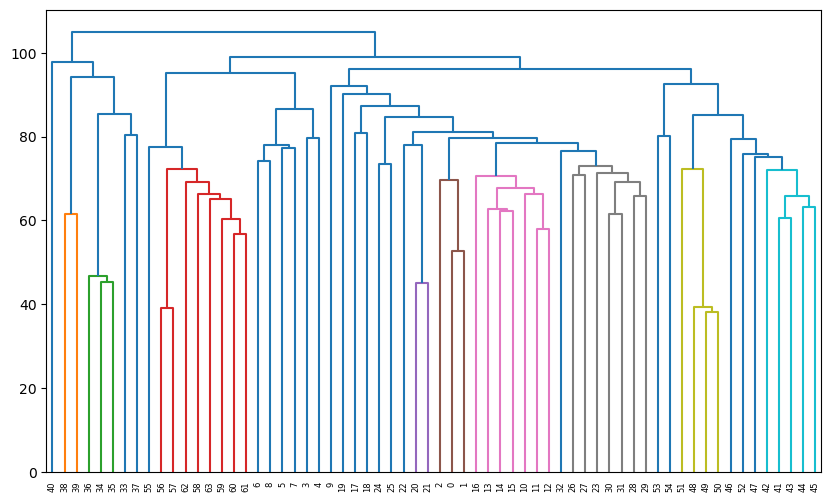

In [29]:
plt.figure(figsize=(10,6))
dendrogram(mergings, labels = data.index)
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
# fitting data 
hc = AgglomerativeClustering(n_clusters =2, affinity ='euclidean', linkage='average')
y_hc = hc.fit_predict(x)

In [32]:
# finding silhouette score
sil_avg2 = silhouette_score(x, y_hc)


In [34]:
sil_avg2

0.12658071592530343

# PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
data.loc[:,:] = scaler.fit_transform(data)

In [39]:
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,-1.705196,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,...,-1.030663,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675
1,-1.109731,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,...,-0.215657,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446
2,-0.514265,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,...,0.452274,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838
3,0.081200,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,...,-1.313667,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408
4,0.676665,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,...,0.718297,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.326263,-0.024977,-0.601719,0.209168,-0.342761,-0.459396,1.159911,-0.706100,0.381357,-0.964676,...,-0.362775,-0.224934,-0.651683,-0.029591,-0.300540,-0.189382,-1.234343,-1.310181,0.284909,0.698834
60,1.380397,-0.573084,0.875343,-0.186266,1.318766,2.117127,0.210772,-0.298243,-1.940254,-0.729836,...,-0.543897,-0.180407,-0.004563,-0.233720,0.281136,-0.342046,-0.092347,-0.657141,-0.889759,-0.382988
61,1.434530,0.523130,-0.788015,-0.302571,-0.924296,0.039286,-1.169792,-1.113957,-1.940254,-0.847256,...,-0.091092,-0.465385,0.498752,-0.335785,1.067185,0.257708,-0.075668,0.367236,3.381761,2.535260
62,1.488663,-0.070652,0.223307,-0.163005,-0.859681,0.039286,-0.019322,1.088471,-0.838977,0.726171,...,1.097522,-0.732552,-0.678646,-1.163643,-0.410587,-0.549234,-0.375762,-0.465070,-0.213435,-1.244439


In [40]:
pc = PCA(25)

In [41]:
pc_arr = pc.fit_transform(data)

In [42]:
pc_arr.shape

(64, 25)

In [43]:
pc_data = pd.DataFrame(pc_arr)

In [44]:
(pc.explained_variance_ratio_ * 100).round(1)

array([11.4,  6.8,  5.8,  4.2,  3.7,  3.6,  3.1,  2.7,  2.5,  2.4,  2.4,
        2.2,  2. ,  2. ,  1.9,  1.8,  1.7,  1.6,  1.6,  1.5,  1.5,  1.5,
        1.4,  1.4,  1.3])

In [45]:
pc_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-19.850188,-3.608134,-9.822030,-0.835943,12.633107,7.490232,14.189483,-3.073053,22.064784,-20.476888,...,-4.567765,21.034811,9.301306,-5.212809,4.262427,-7.872360,-5.648858,11.257398,12.524701,-9.071298
1,-23.098671,-6.482277,-13.476053,5.637402,8.026687,3.740946,10.145524,-7.230756,22.387752,-13.284751,...,6.188160,19.915066,6.735629,-5.365594,14.880220,1.779740,-10.049613,4.987036,9.372769,-9.773622
2,-27.460079,-2.476579,-3.533971,-1.334966,12.575192,17.370180,10.380067,-2.549526,-0.172618,-6.584187,...,-6.711965,13.208242,-0.565051,4.514546,2.945242,-1.137095,6.160313,-7.378561,-1.929895,-5.521227
3,-42.813231,9.783238,-0.900394,3.445917,42.301385,27.222067,17.553728,-0.363956,14.338181,16.061838,...,-20.831006,-3.278358,1.802382,-3.333923,-0.936456,5.188390,-17.161778,9.512945,-13.454054,6.956776
4,-55.410777,5.229096,-21.075903,15.897604,10.444750,12.976715,12.588705,32.518879,-8.000212,-10.224590,...,-4.631043,-21.364847,-17.448669,3.680245,3.780854,4.716640,8.127379,2.793923,-12.285861,-18.758744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-17.976096,47.276316,5.331299,-17.415488,-0.296608,-7.465058,-15.545387,22.353634,-3.000220,22.266845,...,-10.254125,-12.755845,13.344890,3.536796,-0.848851,-1.595583,-5.684515,5.366915,10.571421,-10.697966
60,-4.395879,42.349377,8.659475,-2.825729,5.711965,-3.357148,-11.945079,6.701315,1.857540,3.372354,...,-4.808573,-8.500579,4.914037,6.295789,2.691895,2.720129,-6.152716,2.097346,9.135534,-4.539346
61,-22.948124,36.159452,18.070760,-7.613098,5.832621,0.604399,-7.765384,-5.788048,-5.182751,13.487979,...,-3.006563,3.576921,1.730400,13.562669,20.413086,11.115435,-0.063126,-10.305829,-0.985183,6.685587
62,-19.153432,50.441229,4.144841,-3.039873,-8.278660,-3.716987,-1.894080,12.286409,-3.908837,-13.160384,...,-8.988956,4.346892,-7.482803,-7.740932,-2.010586,-14.763593,4.924126,2.149328,-1.816740,-8.250705


In [46]:
x=pc_data

# KMEANS AFTER PCA

In [47]:
kmean_inst = KMeans(n_clusters=5)

In [48]:
kmean_inst.fit(x)

KMeans(n_clusters=5)

In [49]:
km_labels = kmean_inst.labels_

In [50]:
sil_avg=silhouette_score(x,km_labels)

In [51]:
sil_avg

0.14140870135031935

# AGGLOMERATIVE CLUSTERING AFTER PCA

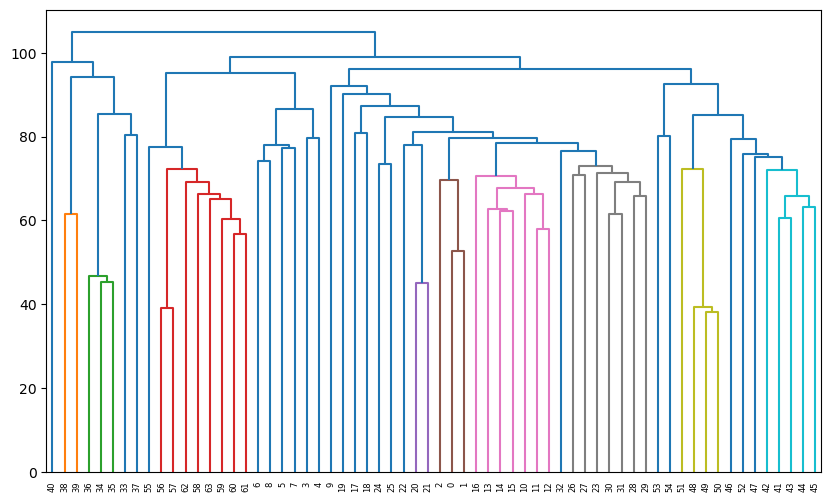

In [52]:
plt.figure(figsize=(10,6))
dendrogram(mergings, labels = pc_data.index)
plt.show()

In [53]:
# fitting data 
hc = AgglomerativeClustering(n_clusters =2, affinity ='euclidean', linkage='average')
y_hc = hc.fit_predict(x)

In [54]:
# finding silhouette score
sil_avg2 = silhouette_score(x, y_hc)


In [55]:
sil_avg2


0.17510861499979

# RESULT

KMEANS CLUSTERING has silhoutte score of   0.11  and  agglomerative clustering has silhoutte score of 0.12

After Applying   PCA and reduce the features to 25  and then repeat the clustering  we can see that the silhoutte score gets 
improved

KMEANS CLUSTERING has silhoutte score of   0.14  and agglomerative clustering has silhoutte score of 0.17

so after PCA the silhoutte score gets improved so the model gets improved
